<a href="https://colab.research.google.com/github/Costa200513/Regresion-lineal-multiple-con-Predict-Diabetes-from-Medical-Records/blob/main/Regresion_lineal_multiple_con_Predict_Diabetes_from_Medical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar el dataset**

In [8]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Relacionmiento de columnas**

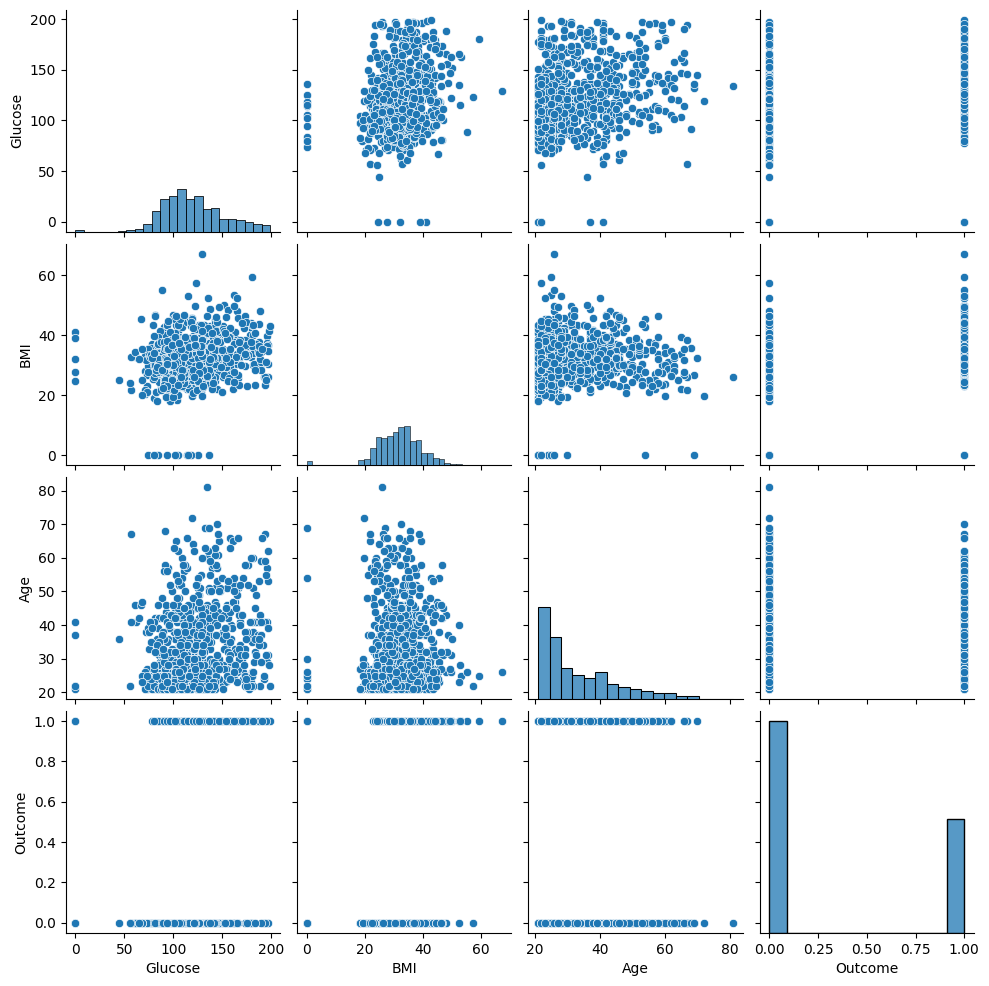

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

cols=["Glucose","BMI","Age", "Outcome"]
sns.pairplot(df[cols])
plt.show()

# **Mapa de calor de las columnas**

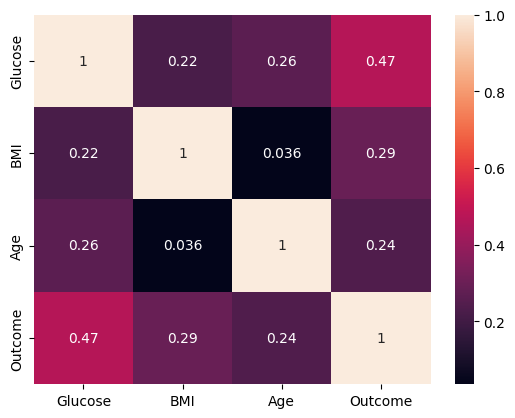

In [10]:
sns.heatmap(df[cols].corr(), annot=True)
plt.show()

# **Preparar la regresion linear**

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# variables independientes
X = df[['Glucose', 'BMI', 'Age']].values
# variable dependiente
y = df['Outcome'].values.reshape(-1,1)

sx = StandardScaler()
sy = StandardScaler()

X_s = sx.fit_transform(X)
Y_s = sy.fit_transform(y)

lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

# **Funcionamiento de la regresión**


In [19]:
import numpy as np
glucosa = float(input("Ingrese el valor de glucosa (mg/dL): "))
IMC = float(input("Ingrese el índice de masa corporal (IMC): "))
edad = int(input("Ingrese la edad del paciente (años): "))

entrada = np.array([[glucosa, IMC, edad]])
entrada_std = sx.transform(entrada)

output_std = lr.predict(entrada_std)
output = sy.inverse_transform(output_std)

print("La probabilidad de tener diabetes es:", round(float(output[0][0]), 2) * 100, "%")

KeyboardInterrupt: Interrupted by user